#### colab로 시작하기

<a href="https://colab.research.google.com/github/LDJWJ/00_TOTO_MLDL_CLASS/blob/master/DL03_03_CNN_20200122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN(Convolution Neural Network)

## 학습 내용
* CNN의 기본 용어 이해
* CNN에 대해 이해해 보기
* CNN을 활용한 신경망 학습시켜 보기

## 기본 용어 이해
<br>
<font size=4 style="color:blue;">커널(kernel) or 필터(filter) :</font> 
    * 입력층의 원도우(이미지)를 은닉층의 뉴런하나로 압축할 때 사용된다. 
    * 기본 신경망을 이용한다면 모든 뉴런 연결(28 x 28=784)을 해야 한다. 784개의 가중치 필요
<br>
<font size=4 style="color:blue;">커널을 사용한다면 3 x 3의 가중치만 사용하면 된다.</font> 
    * 단, 복잡한 특징을 잡기에 부족하므로 보통 커널을 여러개 사용

<br>
<font size=4 style="color:blue;">채널(Channel) :</font> 
    * 하나의 색은 RGB의 세가지 색의 결합으로 이루어진다. 따라서 컬러이미지는 3개의 채널로 구성된다.
<br>

<font size=4 style="color:blue;">스트라이드(Stride) :</font> 
    * 필터는 입력 데이터를 이동하면서 합성곱을 계산합니다. 이때 필터의 순회하는 간격을 의미합니다.
<br>

<font size=4 style="color:blue;">패딩(Padding) :</font> 
    * Convolution 레이어에서 Filter와 Stride로 인해 기존의 데이터가 줄어드는 것을 방지하는 방법. 입력데이터의 외각에 지정된 픽셀만큼 특정값으로 채운다. 보통 패딩 값으로 0으로 채워진다.
<br>

<font size=4 style="color:blue;">Pooling 레이어 :</font> 
    * 컨볼류션층의 출력 데이터를 입력으로 받아, 출력 데이터(Activation Map)의 크기를 줄이거나 특정 데이터를 강조하기 위해 사용. Max Pooling과 Average Pooling,Min Pooling등이 있음.
    * 학습 파라미터 없음.
    * Pooling 레이어를 통해 행렬 크기 감소
    * Pooling 레이어를 통해 채널 수 변경 없음.

* <b>이미지 인식 분야</b>에서는 매우 강력한 성능을 발휘하고 있다.
* 1998년 얀 레쿤(YannLecun)교수가 소개한 이래로 사용되고 있는 신경망이다.
* CNN은 기본적으로 컨볼루션 계층과 풀링(pooling layer)로 구성된다. 
* 평면의 경우, 행렬에서 지정한 영역의 값을 하나로 압축시킨다.
* 하나의 값으로 압축할 때, 
  * 컨볼루션은 가중치와 편향을 적용하고, 
  * 풀링 계층은 단순한 값들중의 하나를 가져오는 방식을 취한다.

In [1]:
import IPython.display as display
from PIL import Image

## CNN의 이해

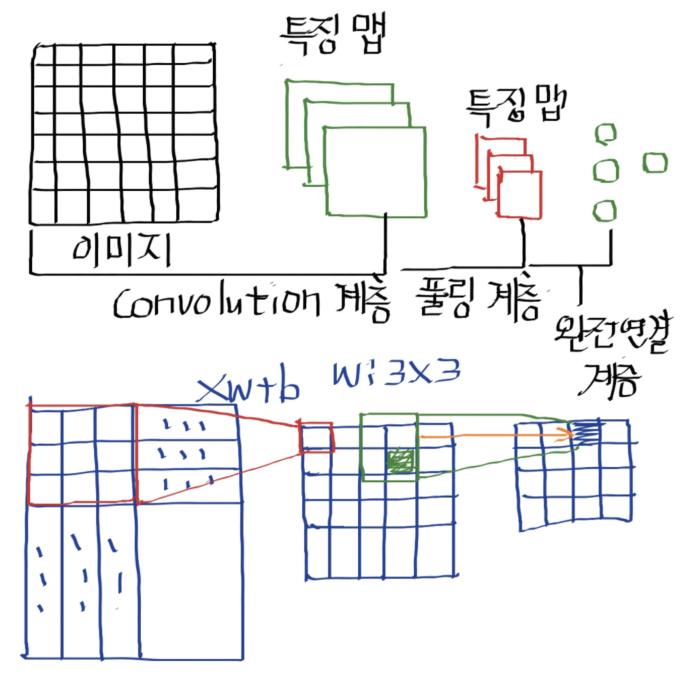

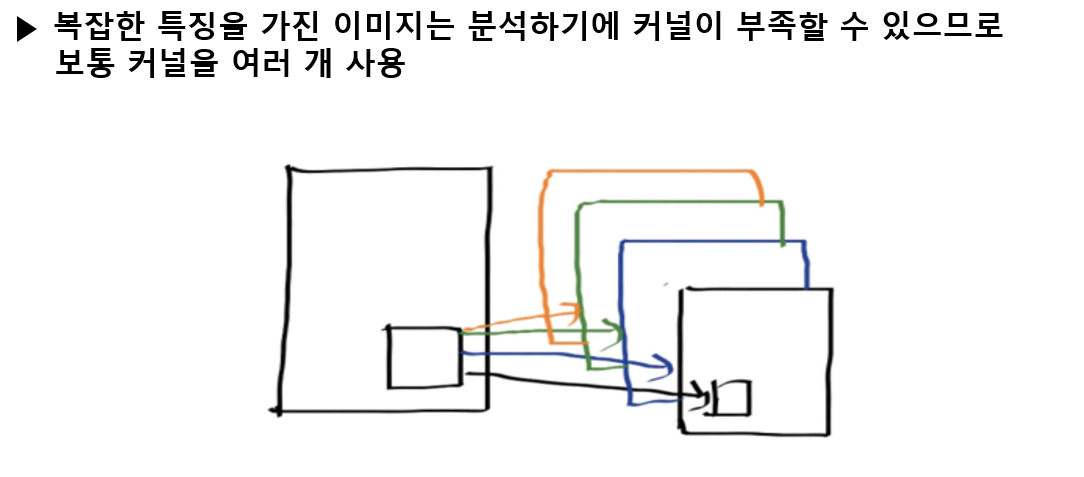

In [2]:
display.display(Image.open("./img/cnn.png"))
display.display(Image.open("./img/multikernel.png"))

## 01 데이터 가져오기

In [19]:
# 이미지 처리 분야에서 가장 유명한 신경망 모델인 CNN 을 이용
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


## 02 신경망 모델 구성
* (28,28,1) 28 픽셀, RGB 단색
* MNIST는 회색조의 이미지로 색상이 한개

In [20]:
# 기존 모델에서는 입력 값을 28x28 하나의 차원으로 구성하였으나,
# CNN 모델을 사용하기 위해 2차원 평면과 특성치의 형태를 갖는 구조로 만듭니다.
# None는 입력데이터의 개수, 
# 마지막 차원 1은 특징의 개수. MNIST는 회색조의 이미지로 색상이 한개
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

## 03 CNN 계층 구성

### W1 [3 3 1 32]
* [3 3]: 커널 크기, 
* 1: 입력값 X 의 특성수, 
* 32: 필터 or 커널 갯수

### L1 Conv shape=(?, 28, 28, 32)
###    Pool     ->(?, 14, 14, 32)

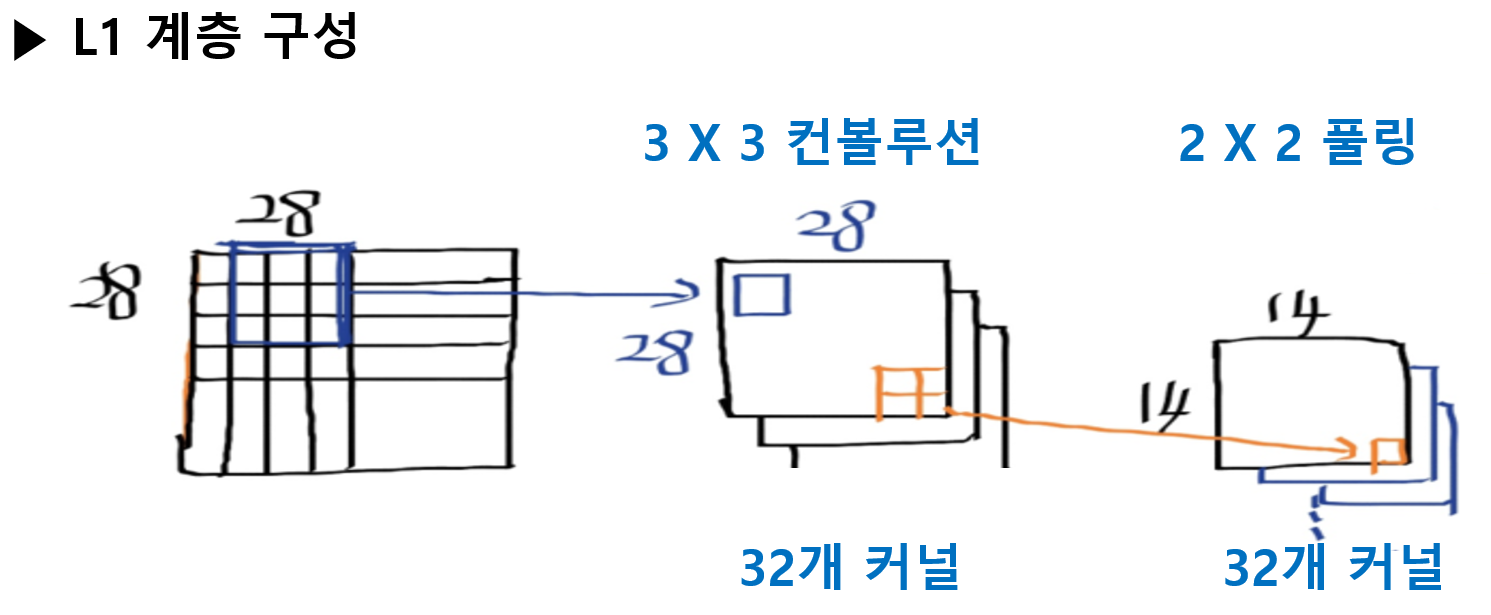

In [3]:
display.display(Image.open("./img/L1_Cnn.png"))

* 원도우의 크기 3 X 3 의 32개 커널을 사용

In [21]:
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))  # W1 커널

# 이미지의 가장 외곽에서 한 칸 밖으로 움직이는 옵션, 테두리까지도 평가함.
L1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')  
L1 = tf.nn.relu(L1)  # 활성화 함수

In [22]:
print(W1)
print(L1)

<tf.Variable 'Variable_6:0' shape=(3, 3, 1, 32) dtype=float32_ref>
Tensor("Relu_4:0", shape=(?, 28, 28, 32), dtype=float32)


### Pooling
* ksize : 2 X 2로 하는 풀링 계층
* strides : 슬라이딩 시 두 칸씩 움직이겠다.

In [23]:
# Pooling 역시 tf.nn.max_pool 을 이용
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
print(L1)

Tensor("MaxPool_2:0", shape=(?, 14, 14, 32), dtype=float32)


### 두번째 계층 구성

* 두 번째 컨볼루션 계층의 커널인 W2의 변수의 구성은 [3,3,32,64]이다.
* 32는 앞서 구성된 첫 번째 컨볼루션 계층의 커널 개수이다.
* 즉 출력층의 개수이며, 첫 번째 컨볼루션 계층이 찾아낸 이미지의 특징 개수라고 할 수 있다.

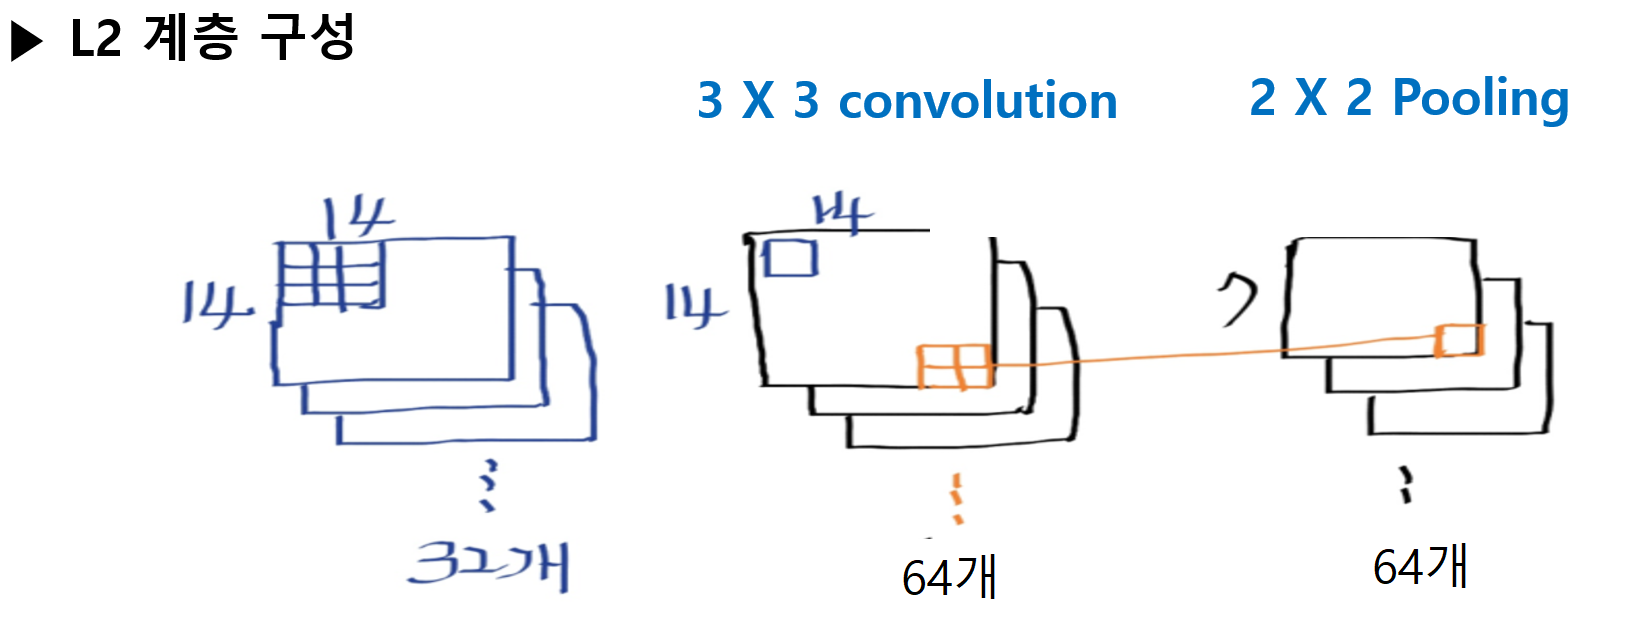

In [4]:
display.display(Image.open("./img/L2_Cnn.png"))

In [24]:
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

### 세번째 계층 구성

* 앞의 풀링 계층의 크기가 7 X 7 X 64 이므로, tf.reshape함수를 이용. 1차원으로 만듬.
* 인접한 계층의 모든 뉴런과 상호 연결된 계층을 완전 연결 계층(fully connect layer)라 한다
* 마지막 층의 뉴런수는 256개.

In [25]:
W3 = tf.Variable(tf.random_normal([7 * 7 * 64, 256], stddev=0.01))
L3 = tf.reshape(L2, [-1, 7 * 7 * 64])
L3 = tf.matmul(L3, W3)
L3 = tf.nn.relu(L3)
L3 = tf.nn.dropout(L3, keep_prob)

In [26]:
# 최종 출력값 L3 에서의 출력 256개를 입력값으로 받아서 
# 0~9 레이블인 10개의 출력값을 만듭니다.
W4 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L3, W4)

### 비용함수, 최적화 함수 구성

In [27]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, 
                                                                 labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

### 신경망 모델 학습 

In [28]:
#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

In [29]:
%%time

for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # 이미지 데이터를 CNN 모델을 위한 자료형태인 [28 28 1] 의 형태로 재구성합니다.
        batch_xs = batch_xs.reshape(-1, 28, 28, 1)

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          keep_prob: 0.7})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

Epoch: 0001 Avg. cost = 0.333
Epoch: 0002 Avg. cost = 0.104
Epoch: 0003 Avg. cost = 0.074
Epoch: 0004 Avg. cost = 0.056
Epoch: 0005 Avg. cost = 0.046
Epoch: 0006 Avg. cost = 0.040
Epoch: 0007 Avg. cost = 0.033
Epoch: 0008 Avg. cost = 0.028
Epoch: 0009 Avg. cost = 0.025
Epoch: 0010 Avg. cost = 0.022
Epoch: 0011 Avg. cost = 0.020
Epoch: 0012 Avg. cost = 0.017
Epoch: 0013 Avg. cost = 0.017
Epoch: 0014 Avg. cost = 0.014
Epoch: 0015 Avg. cost = 0.014
최적화 완료!
Wall time: 12min 33s


In [30]:
#########
# 결과 확인
######
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images.reshape(-1, 28, 28, 1),
                                   Y: mnist.test.labels,
                                   keep_prob: 1}))

정확도: 0.9908


### (실습과제)
### 01. AdamOptimizer를 RMSPropOptimizer로 변경해서 해보기

### (추가과제)
### 02. RMSPropOptimizer와 기타 최적화 함수를 알아보기(적용해보기)
* 어떤 것이 성능이 가장 좋은가?

### REF
* 컨볼루션 참고 : 
 * http://bitly.kr/jereFi6
 * http://bitly.kr/rX6s5iw
 * https://mlblr.com/includes/research/index.html : Convolution 이해, 다양한 논문
 * 국내(http://bitly.kr/wzCehHv) : CNN 용어 및 계산

* Last : 2020/01/22